### **Bike Sharing Rental Data**

## Introduction

[Sumber data](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset) 

#### **Contents**

- Business Problem Understanding
- Data Understanding
- Data Preprocessing
- Modeling
- Conclusion
- Recommendation

****

## **Domain Knowledge and Business Understanding**

**Context**
***

Sistem berbagi sepeda adalah generasi baru dari penyewaan sepeda tradisional di mana seluruh proses dari keanggotaan, penyewaan, dan pengembalian sepeda telah menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan mengembalikannya ke posisi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, ada minat besar dalam sistem-sistem ini karena peran pentingnya dalam masalah lalu lintas, lingkungan, dan kesehatan.

Selain aplikasi dunia nyata yang menarik dari sistem berbagi sepeda, karakteristik data yang dihasilkan oleh sistem-sistem ini membuat mereka menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan, dan posisi kedatangan secara eksplisit dicatat dalam sistem-sistem ini. Fitur ini mengubah sistem berbagi sepeda menjadi jaringan sensor virtual yang dapat digunakan untuk mendeteksi mobilitas di kota. Oleh karena itu, diharapkan bahwa sebagian besar peristiwa penting di kota dapat dideteksi melalui pemantauan data ini.

Kumpulan data ini memberikan informasi tentang jumlah sepeda yang disewakan secara per jam dan harian dari tahun 2011 hingga 2012 dalam sistem berbagi sepeda Capital, termasuk detail tentang kondisi cuaca dan faktor musiman selama periode tersebut.

Problem Statements
***
Penggunaan sharing sepeda dengan jumlah pengguna yang sangat besar diseluruh dunia menimbulkan sebuah pertanyaan, bagaimana cara perusahaan mengelola proses operasi dari penyediaan sepeda ini dengan optimal, yaitu meminimalisir *cost* 

Untuk itu 




### Importing Dataset and Modules

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data_bike_sharing.csv')
df = pd.DataFrame(data)
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


In [3]:
print(f" Starting date = {df.dteday.min()}, \n Ending date = {df.dteday.max()}")

 Starting date = 2011-01-01, 
 Ending date = 2012-12-31


Dataset yang akan digunakan sebagai dasar untuk pengembangan algoritma Machine Learning ini mencakup data yang tercatat dalam rentang waktu tahun 2011 hingga 2012.

## Exploratory Data Analysis

In [4]:
# def groupingcount(name=hour,column='hr', source=df, target='cnt'):
#     name['sum'] = source.groupby(by=column)[target].sum()
#     name['mean'] = source.groupby(by=column)[target].mean()
#     name['min'] = source.groupby(by=column)[target].min()
#     name['max'] = source.groupby(by=column)[target].max()
#     return name

In [5]:
# def linerange(data=df,name='Hour',color='blue'):
#     plt.figure(figsize=(10, 6))
#     plt.plot(data.index, data['mean'], label='Mean', color='blue')
#     plt.fill_between(data.index, data['min'], data['max'], color='blue', alpha=0.2, label='Range')

#     plt.xlabel(f'{name}')
#     plt.ylabel('Values')
#     plt.title('Mean with Min-Max Range')
#     plt.legend()
#     # Display the plot
# plt.show()

In [6]:
df.columns

Index(['dteday', 'hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp',
       'hr', 'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# hour = pd.DataFrame()
# groupingcount(hour,'hr')
# date = pd.DataFrame()
# groupingcount(date,'date')
# month = pd.DataFrame()
# groupingcount(month,'month')

In [8]:
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


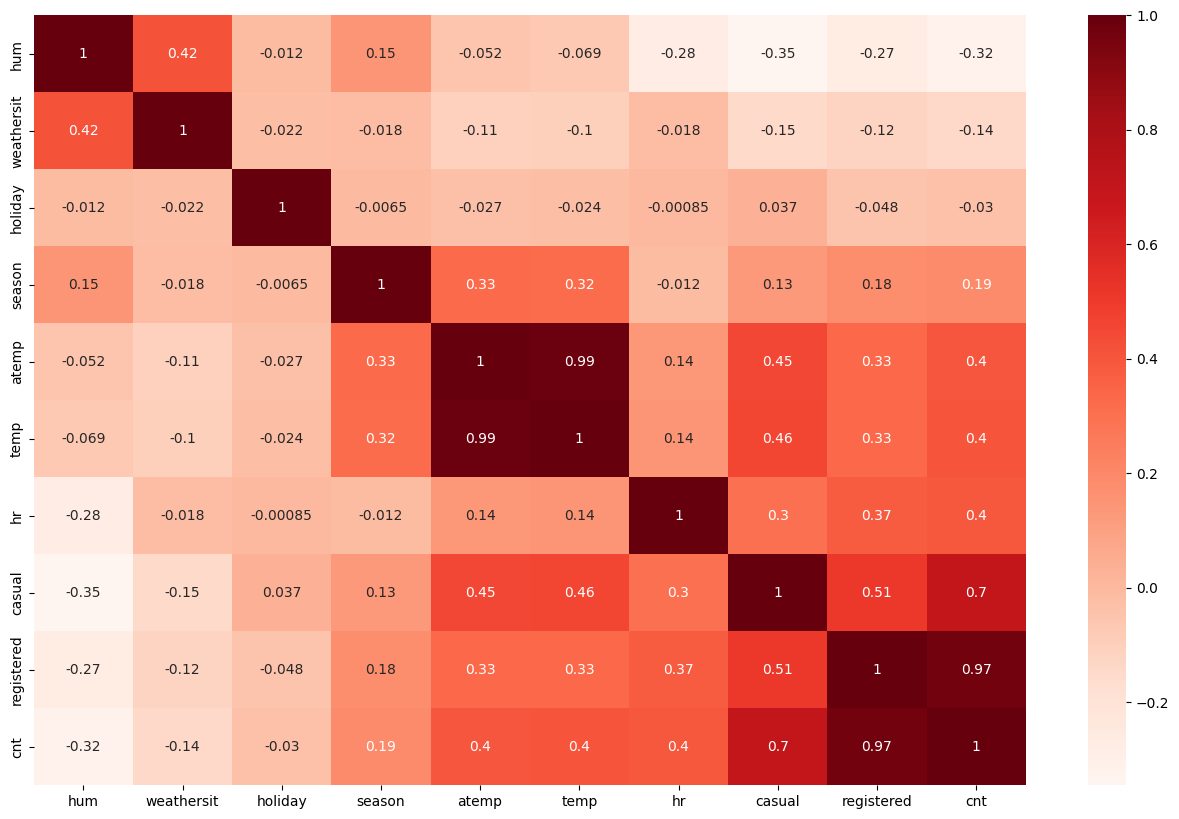

In [10]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.show()

## Data Preprocessing

Tahap selanjutnya adalah melakukan Data Preprocessing untuk memastikan bahwa model mendapatkan input dengan kualitas yang terbaik. 

In [11]:
# duplikasi dataset
df_model = df.copy()
df_model

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


In [12]:
items = []

for col in df_model.columns:
    if len(df_model[col].drop_duplicates()) < 4:
        items.append([col, 
                  df_model[col].dtype,
                    df_model[col].isna().sum(), 
                    df_model[col].nunique(),
                    list(df_model[col].drop_duplicates().values)])
    else:
        items.append([col, 
                  df_model[col].dtype,
                    df_model[col].isna().sum(), 
                    df_model[col].nunique(),
                    list(df_model[col].drop_duplicates().head(4).values)])

featuredesc = pd.DataFrame(columns=['features','dtypes','null','unique','sample'],data=items)
featuredesc


,features,dtypes,null,unique,sample
0,dteday,object,0,731,"[2011-12-09, 2012-06-17, 2011-06-15, 2012-03-31]"
1,hum,float64,0,89,"[0.62, 0.64, 0.53, 0.87]"
2,weathersit,int64,0,4,"[1, 2, 3, 4]"
3,holiday,int64,0,2,"[0, 1]"
4,season,int64,0,4,"[4, 2, 3, 1]"
5,atemp,float64,0,65,"[0.3485, 0.5152, 0.6212, 0.697]"
6,temp,float64,0,50,"[0.36, 0.54, 0.62, 0.76]"
7,hr,int64,0,24,"[16, 4, 23, 8]"
8,casual,int64,0,305,"[24, 2, 17, 19]"
9,registered,int64,0,742,"[226, 16, 90, 126]"


In [13]:
print(f'''Number of Duplicated data = {df_model.duplicated().sum()}''')

Number of Duplicated data = 0


In [14]:
df_model.describe()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


**Feature Selection and Data Encoding**

In [15]:
df_model['dteday'] = pd.to_datetime(df_model['dteday'])
df_model['day'] = df_model['dteday'].dt.day_of_week
df_model['date'] = df_model['dteday'].dt.day
df_model['month'] = df_model['dteday'].dt.month
df_model['year'] = df_model['dteday'].dt.year
df_model.drop(columns='dteday',inplace=True)

In [16]:
df_model

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,day,date,month,year
0,0.62,1,0,4,0.3485,0.36,16,24,226,250,4,9,12,2011
1,0.64,1,0,2,0.5152,0.54,4,2,16,18,6,17,6,2012
2,0.53,1,0,2,0.6212,0.62,23,17,90,107,2,15,6,2011
3,0.87,2,0,2,0.3485,0.36,8,19,126,145,5,31,3,2012
4,0.55,1,0,3,0.6970,0.76,18,99,758,857,1,31,7,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,0.75,1,0,1,0.2273,0.24,7,14,243,257,2,25,1,2012
12161,0.62,1,0,3,0.7424,0.78,0,39,63,102,4,6,7,2012
12162,0.60,2,1,1,0.2121,0.24,5,0,6,6,0,20,2,2012
12163,0.77,2,0,2,0.4242,0.42,2,14,55,69,5,31,3,2012


In [17]:
items = []

for col in df_model.columns:
    if len(df_model[col].drop_duplicates()) < 4:
        items.append([col, 
                  df_model[col].dtype,
                    df_model[col].isna().sum(), 
                    df_model[col].nunique(),
                    list(df_model[col].drop_duplicates().values)])
    else:
        items.append([col, 
                  df_model[col].dtype,
                    df_model[col].isna().sum(), 
                    df_model[col].nunique(),
                    list(df_model[col].drop_duplicates().head(4).values)])

featuredesc = pd.DataFrame(columns=['features','dtypes','null','unique','sample'],data=items)
featuredesc


,features,dtypes,null,unique,sample
0,hum,float64,0,89,"[0.62, 0.64, 0.53, 0.87]"
1,weathersit,int64,0,4,"[1, 2, 3, 4]"
2,holiday,int64,0,2,"[0, 1]"
3,season,int64,0,4,"[4, 2, 3, 1]"
4,atemp,float64,0,65,"[0.3485, 0.5152, 0.6212, 0.697]"
5,temp,float64,0,50,"[0.36, 0.54, 0.62, 0.76]"
6,hr,int64,0,24,"[16, 4, 23, 8]"
7,casual,int64,0,305,"[24, 2, 17, 19]"
8,registered,int64,0,742,"[226, 16, 90, 126]"
9,cnt,int64,0,830,"[250, 18, 107, 145]"


Pada tahap ini akan dilakukan *feature selection* untuk memilih variabel atau *feature* mana yang akan digunakan untuk melakukan training model Machine Learning ini.

**Data Encoding**

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [64]:
# One Hot Encoding
encoder = OneHotEncoder()
transformer = ColumnTransformer([('Encoder',encoder,['weathersit','season'])],
                                remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('Encoder', OneHotEncoder(),
                                 ['weathersit', 'season'])])

## Modeling

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.pipeline import Pipeline

In [21]:
# column

df_model.columns

Index(['hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp', 'hr',
       'casual', 'registered', 'cnt', 'day', 'date', 'month', 'year'],
      dtype='object')

Train and Test Split

In [22]:
from sklearn.model_selection import train_test_split
X = df_model.drop(columns=['cnt','casual','registered','atemp'])
y = df_model['cnt']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=99,test_size=0.2)

In [23]:
# Algorithms
lr = LinearRegression()
lightgbm = LGBMRegressor()
gbr = GradientBoostingRegressor()
rf = RandomForestRegressor()
et = ExtraTreesRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()

models = [lr,lightgbm,gbr,rf,et,xgb,knn,dt]

In [66]:
# parameter model
score_rmse = []
mean_rmse = []
std_rmse = []

score_mae = []
mean_mae = []
std_mae = []

score_mape = []
mean_mape = []
std_mape = []

for reg in models:
    # crossval = KFold(n_splits=5, shuffle=True, random_state=99)

    estimator = Pipeline([('encoder',transformer),
                          ('model', reg)])
    
    # RMSE
    model_cval_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        # cv=crossval,
        cv=5,
        scoring='neg_root_mean_squared_error',
        error_score='raise')

    print(model_cval_rmse, reg)

    score_rmse.append(model_cval_rmse)
    mean_rmse.append(model_cval_rmse.mean())
    std_rmse.append(model_cval_rmse.std())

    # MAE
    model_cval_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        # cv=crossval,
        cv=5,
        scoring='neg_mean_absolute_error',
        error_score='raise')
    score_mae.append(model_cval_mae)
    mean_mae.append(model_cval_mae.mean())
    std_mae.append(model_cval_mae.std())

    print(model_cval_mae, reg)

    # MAPE
    model_cval_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        # cv=crossval,
        cv=5,
        scoring='neg_mean_absolute_error',
        error_score='raise')
    score_mape.append(model_cval_mape)
    mean_mape.append(model_cval_mape.mean())
    std_mape.append(model_cval_mape.std())

    print(model_cval_mape, reg)

[-162.64785294 -162.34252364 -161.90617797 -164.08711428 -162.85944236] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-106.89551566 -107.01161745 -106.89400482 -108.00661702 -109.58879648] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-106.89551566 -107.01161745 -106.89400482 -108.00661702 -109.58879648] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 7785, number of used features: 15
[LightGBM] [Info] Start training from

In [67]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
evaluation = pd.DataFrame({
    'Model': ['Linear Regression', 'LightGBM Regressor', 'GBR Regressor', 'Random Forest Regressor', 'Extra Trees Regressor','XGBoost Regressor','KNeighbors Regressor','Decision Tree Regressor'],
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape,
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mean_mae,
    'Std_MAE': std_mae})

evaluation.round(2)

,Model,Mean_MAPE,Std_MAPE,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE
0,Linear Regression,-107.68,1.04,-162.77,0.73,-107.68,1.04
1,LightGBM Regressor,-27.02,0.99,-44.34,2.15,-27.02,0.99
2,GBR Regressor,-47.58,0.29,-77.80,0.48,-47.58,0.29
3,Random Forest Regressor,-27.88,0.64,-46.35,1.39,-28.01,0.77
4,Extra Trees Regressor,-27.12,0.86,-45.17,2.06,-27.22,1.00
5,XGBoost Regressor,-25.69,1.05,-42.56,2.19,-25.69,1.05
6,KNeighbors Regressor,-53.56,0.71,-87.64,1.89,-53.56,0.71
7,Decision Tree Regressor,-37.07,0.52,-61.93,2.68,-37.26,0.57


Benchmarking the Model

In [57]:
# Melakukan logaritma agar 
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_lightgbm = TransformedTargetRegressor(lightgbm, func=np.log, inverse_func=np.exp)
log_gbr = TransformedTargetRegressor(gbr, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_et = TransformedTargetRegressor(et, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)

models = [log_lr,log_lightgbm,log_gbr,log_rf,log_et, log_xgb, log_knn, log_dt]


In [58]:
# parameter model
score_rmse = []
mean_rmse = []
std_rmse = []

score_mae = []
mean_mae = []
std_mae = []

score_mape = []
mean_mape = []
std_mape = []

for reg in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=99)

    estimator = Pipeline([('encoder',transformer),
                          ('model', reg)])
    
    # RMSE
    model_cval_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise')

    print(model_cval_rmse, reg)

    score_rmse.append(model_cval_rmse)
    mean_rmse.append(model_cval_rmse.mean())
    std_rmse.append(model_cval_rmse.std())

    # MAE
    model_cval_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise')
    score_mae.append(model_cval_mae)
    mean_mae.append(model_cval_mae.mean())
    std_mae.append(model_cval_mae.std())

    print(model_cval_mae, reg)

    # MAPE
    model_cval_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise')
    score_mape.append(model_cval_mape)
    mean_mape.append(model_cval_mape.mean())
    std_mape.append(model_cval_mape.std())

    print(model_cval_mape, reg)

[-154.29173202 -166.08225214 -159.84921746 -163.78087363 -168.73223547] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-102.46310577 -108.78699004 -105.95175598 -108.05671569 -112.47103765] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-102.46310577 -108.78699004 -105.95175598 -108.05671569 -112.47103765] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 7785, number of used features: 15
[LightGBM] [Info] Start training from

In [59]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
evaluation = pd.DataFrame({
    'Model': ['Linear Regression', 'LightGBM Regressor', 'GBR Regressor', 'Random Forest Regressor', 'Extra Trees Regressor','XGBoost Regressor','KNeighbors Regressor','Decision Tree Regressor'],
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape,
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mean_mae,
    'Std_MAE': std_mae
    })

evaluation.round(2)

,Model,Mean_MAPE,Std_MAPE,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE
0,Linear Regression,-107.55,3.30,-162.55,5.05,-107.55,3.30
1,LightGBM Regressor,-27.37,0.58,-44.77,1.27,-27.37,0.58
2,GBR Regressor,-48.51,1.05,-78.72,2.31,-48.51,1.05
3,Random Forest Regressor,-28.01,0.46,-46.65,0.85,-27.98,0.41
4,Extra Trees Regressor,-27.24,0.49,-44.93,1.13,-27.24,0.59
5,XGBoost Regressor,-25.73,0.40,-42.71,1.60,-25.73,0.40
6,KNeighbors Regressor,-53.84,1.41,-87.87,3.53,-53.84,1.41
7,Decision Tree Regressor,-37.44,1.40,-63.50,2.33,-37.04,1.20


In [60]:

display(
len(score_rmse ),
len(mean_rmse ),
len(std_rmse ),
len(score_mae ),
len(mean_mae ),
len(std_mae ),
len(score_mape ),
len(mean_mape ),
len(std_mape ))

8

8

8

8

8

8

8

8

8